In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss

Loading the data set

In [145]:
train = pd.read_csv('/content/train.csv')

In [146]:
train.shape

(4500, 514)

In [147]:
train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


In [148]:
train.isnull().sum()

id         0
v1         0
v2         0
v3         0
v4         0
          ..
v509       0
v510       0
v511       0
v512       0
glasses    0
Length: 514, dtype: int64

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 514 entries, id to glasses
dtypes: float64(512), int64(2)
memory usage: 17.6 MB


In [150]:
train.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2250.500000,0.029433,-0.072952,-0.063137,-0.027426,0.009050,-0.032587,0.005451,-0.101231,-0.134099,0.067560,-0.002083,0.078040,-0.024938,-0.029395,0.027814,-0.050992,0.121394,0.106751,0.001935,0.047460,-0.018330,-0.058942,0.055872,-0.083219,-0.023057,0.045138,0.080400,-0.032720,0.037929,0.016872,0.175460,0.086574,-0.088680,-0.054209,-0.019898,0.085469,-0.146745,-0.000734,-0.163095,...,0.013406,0.087366,-0.048248,-0.077322,-0.049410,0.018462,-0.036421,0.053984,-0.128585,-0.037571,-0.038897,0.082227,-0.075013,-0.074086,0.044075,0.009034,-0.207801,0.119168,-0.002119,0.023028,-0.082201,-0.060344,-0.088316,0.023726,0.088277,0.025180,-0.027934,0.067269,-0.020810,-0.115068,-0.091886,0.057622,-0.063235,-0.081697,-0.032337,-0.084307,-0.032826,0.096038,-0.064696,0.634667
std,1299.182435,0.769812,0.740963,0.746607,0.744712,0.775853,0.770992,0.761690,0.748796,0.746005,0.747827,0.714939,0.706872,0.663820,0.812123,0.755075,0.751805,0.772157,0.723660,0.758057,0.767998,0.712469,0.770689,0.754416,0.761771,0.773681,0.764593,0.735932,0.751691,0.776739,0.743376,0.767899,0.815652,0.763232,0.731656,0.746060,0.718874,0.770070,0.780750,0.745571,...,0.695161,0.696326,0.770055,0.681999,0.755388,0.738660,0.758322,0.713244,0.762161,0.752204,0.745001,0.753694,0.729876,0.771973,0.752416,0.766827,0.738646,0.724609,0.774068,0.750480,0.746982,0.809670,0.735013,0.692339,0.820121,0.757211,0.757624,0.748709,0.755673,0.735968,0.735644,0.739561,0.731691,0.761166,0.738119,0.743303,0.756891,0.737970,0.830538,0.481577
min,1.000000,-2.895330,-2.381940,-2.599930,-2.748930,-2.291530,-4.020940,-2.736720,-2.872970,-2.397950,-2.768610,-3.220590,-2.342850,-3.063600,-2.655160,-2.394360,-2.711950,-3.070490,-2.352870,-2.819900,-2.521800,-2.366830,-3.290500,-2.332010,-2.569310,-2.460720,-2.406860,-2.527720,-2.841720,-2.551610,-2.209130,-3.108830,-2.674820,-3.121610,-3.072380,-2.545570,-2.077640,-3.127940,-2.741990,-2.663210,...,-2.409010,-2.726200,-2.931060,-2.221200,-2.210510,-2.548280,-2.654120,-2.666030,-2.746630,-2.810960,-3.180610,-2.232400,-2.435070,-3.109640,-2.594380,-2.391540,-2.737760,-2.293100,-2.493990,-2.443920,-2.523910,-3.252070,-2.860860,-2.447960,-2.610140,-2.591580,-2.418330,-2.469600,-2.350780,-2.586140,-2.788230,-2.624400,-2.806240,-2.907480,-3.136690,-2.490630,-2.510730,-2.626380,-2.906970,0.000000
25%,1125.750000,-0.489807,-0.568788,-0.575425,-0.548003,-0.541330,-0.550515,-0.516868,-0.582322,-0.658523,-0.455873,-0.501383,-0.369287,-0.458875,-0.574332,-0.507650,-0.573000,-0.408225,-0.340958,-0.458318,-0.479683,-0.532473,-0.578270,-0.474053,-0.608855,-0.556867,-0.519232,-0.421403,-0.543945,-0.482272,-0.518310,-0.352270,-0.421890,-0.608073,-0.528593,-0

Plotting the count of target variable

In [151]:
train['glasses'].unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


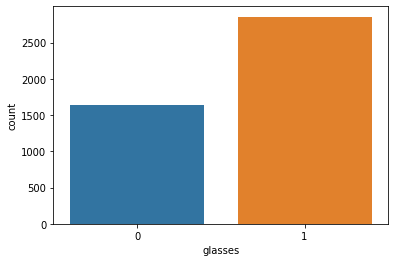

In [152]:
train.glasses.value_counts()
sns.countplot(train.glasses)
plt.show()

Finding correlation between features

In [153]:
corelation = train.corr(method = 'pearson')

In [154]:
corelation

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
id,1.000000,0.019036,-0.013275,-0.016900,0.006317,-0.009578,0.008953,0.012322,-0.019642,-0.009119,0.026135,0.011110,0.005420,0.022729,-0.025026,-0.010247,0.006800,-0.003634,-0.019118,0.014224,0.026672,0.014125,-0.014811,0.033856,-0.004401,0.009990,0.001235,0.006557,0.011287,-0.006955,-0.003445,-0.010146,-0.006264,0.004514,-0.012368,-0.021331,-0.005809,-0.014936,0.000696,-0.001107,...,0.017279,0.007117,-0.005094,-0.006622,0.012938,0.009656,-0.012126,-0.000728,-0.017958,0.014450,0.003588,0.016298,0.024562,0.000738,-0.029934,0.003755,0.000796,0.014985,-0.001095,-0.000137,0.007060,0.015716,0.014922,-0.006911,-0.015735,0.000544,-0.013838,0.002300,-0.012927,0.038097,-0.006643,0.016269,0.004065,-0.025122,0.001336,-0.001082,0.012650,-0.010612,0.007302,0.018092
v1,0.019036,1.000000,-0.002023,0.038853,-0.094311,-0.017213,-0.030966,-0.021780,0.074147,0.042498,-0.051538,-0.053732,0.028264,-0.061249,0.092559,-0.007675,0.030563,-0.084676,0.024319,0.039792,0.057275,-0.033388,0.013504,-0.013844,-0.004062,-0.058511,-0.015210,0.015017,0.060999,0.067424,0.054880,0.001614,0.062482,-0.064381,-0.030171,-0.092070,-0.003760,-0.033136,0.082490,-0.075561,...,-0.049884,0.009072,-0.047971,0.099240,0.050611,-0.020465,-0.042700,0.066230,0.062505,0.098477,0.056215,-0.022425,-0.010289,-0.065679,-0.017013,-0.069337,0.049625,-0.000146,0.028859,-0.033765,-0.024855,-0.039981,0.121632,0.094019,0.028013,-0.046761,0.008447,0.097570,-0.028233,-0.068844,0.035670,-0.041801,-0.072450,-0.090454,0.011260,-0.003808,0.033349,-0.056485,-0.039899,0.061264
v2,-0.013275,-0.002023,1.000000,0.102281,-0.066199,-0.045020,-0.126731,-0.017119,0.005107,-0.010590,0.000576,-0.066252,-0.052578,0.004483,0.038211,0.062228,-0.040487,0.015248,0.037498,0.000259,0.027014,-0.065840,0.096061,-0.064186,0.012157,0.006011,0.023161,0.092200,-0.125486,-0.072283,-0.101518,0.046429,0.058720,-0.006731,0.038877,0.002893,-0.087542,0.007727,-0.085660,0.064870,...,0.078440,0.106401,0.065363,0.003558,-0.037596,0.027438,0.009486,0.090962,-0.013106,-0.025440,0.088297,0.097025,-0.010813,0.078968,-0.135279,-0.005574,0.003527,-0.072617,0.041403,0.044609,0.121311,0.028647,0.002063,0.064988,-0.056847,-0.066102,0.102364,0.028785,0.102779,0.122050,0.027770,-0.047446,0.026986,0.059907,0.014082,-0.010682,-0.072824,-0.014253,0.044633,-0.065607
v3,-0.016900,0.038853,0.102281,1.000000,-0.002259,0.042269,-0.042258,0.027575,-0.039317,-0.018468,0.061344,-0.048270,-0.057431,-0.009537,0.051474,0.034826,-0.180503,-0.028195,-0.010000,-0.097245,0.058237,0.041098,0.056646,0.051710,0.073948,0.033764,0.053159,-0.066510,-0.037239,0.078155,-0.060878,0.005933,-0.053192,-0.054221,0.031730,0.046891,-0.038609,0.046318,0.004848,0.067738,...,-0.015883,0.092658,0.041912,0.115282,0.022207,-0.012188,0.096893,0.062614,-0.021925,0.010066,0.080001,0.110309,-0.106153,0.049941,-0.124584,0.026452,0.042935,0.074813,0.103057,0.045816,0.052361,0.018591,-0.001712,0.067532,-0.034477,0.038194,-0.028966,0.040545,-0.000866,0.005674,0.035577,-0.031420,-0.099403,0.037249,-0.011012,-0.021491,-0.035097,-0.016781,0.172592,-0.110720
v4,0.006317,-0.094311,-0.066199,-0.002259,1.000000,-0.062721,0.084357,0.059756,0.008754,0.026371,0.076558,-0.043119,-0.021635,-0.048496,0.076913,0.019023,-0.043708,0.015616,0.075083,-0.001627,-0.031727,-0.022143,-0.067371,0.019801,0.029317,0.037138,0.133788,-0.120187,-0.122012,0.042001,0.032112,-0.064768,-0.061465,0.086821,0.058941,0.042201,0.053570,0.058982,0.035903,0.087380,...,0.050494,0.015502,-0.017450,0.038318,-0.011984,0.087157,0.024929,0.068262,0.116654,0.005065,0.045071,-0.097506,0.006965,-0.066821,-0.016193,0.045740,-0.046783,0.036712,0.089446,-0.004556,-0.011620,-0.008537

Seperating the input and output dataset

In [155]:
x = train.iloc[:,1:513]
x.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,...,v473,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
0,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,0.47676,...,-0.39096,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609
1,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,-0.36710,...,-1.33041,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496
2,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,-0.64555,...,-0.65124,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982
3,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,-0.27174,...,-0.64236,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755
4,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,0.50747,...,1.08390,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298


In [156]:
y = train.iloc[:,513]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: glasses, dtype: int64

Normalizing the data by mean subtraction followed by standard deviation division.

In [157]:
sc = StandardScaler()
x = sc.fit_transform(x.values)
y = y.values

Spiliting the train-test dataset

In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

fitting the model without using feature selection

In [159]:
clf = svm.SVC(gamma = 'auto',probability = True)
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [160]:
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

1.0

In [161]:
y_pred_proba = clf.predict_proba(x_test)

In [162]:
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[331,   0],
       [  0, 569]])

Text(69.0, 0.5, 'Truth')

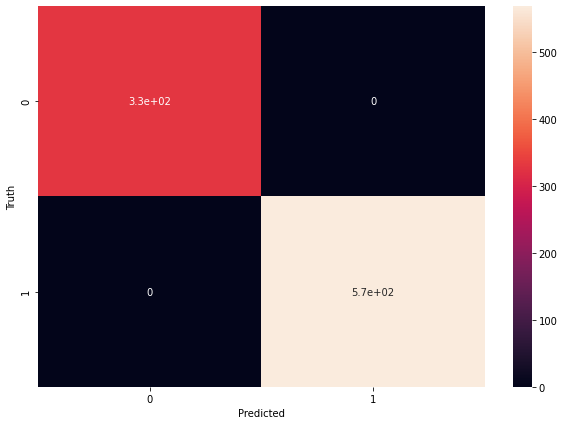

In [163]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       569

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



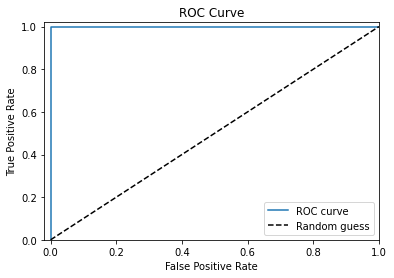

In [165]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [166]:
log_loss(y_test,y_pred_proba)

0.0004504479712458855

using cross validation

In [167]:
print(cross_val_score(clf, x, y, cv=5))

[1. 1. 1. 1. 1.]


fitting the model using feature selection

In [168]:
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [169]:
pca = PCA(0.95)
x_train_p = pca.fit_transform(x_train_std) 
x_test_p = pca.transform(x_test_std)

In [170]:
print(x_train_p.shape)
print(x_train_std.shape)

(3600, 358)
(3600, 512)


In [171]:
model = svm.SVC(gamma = 'auto',probability = True)
model.fit(x_train_p,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [172]:
prediction = model.predict(x_test_p)
acc_score_pca = metrics.accuracy_score(prediction,y_test)
acc_score_pca

1.0

In [173]:
prediction_proba = model.predict_proba(x_test_p)

In [174]:
cm2 = confusion_matrix(y_test, prediction)
cm2

array([[331,   0],
       [  0, 569]])

Text(69.0, 0.5, 'Truth')

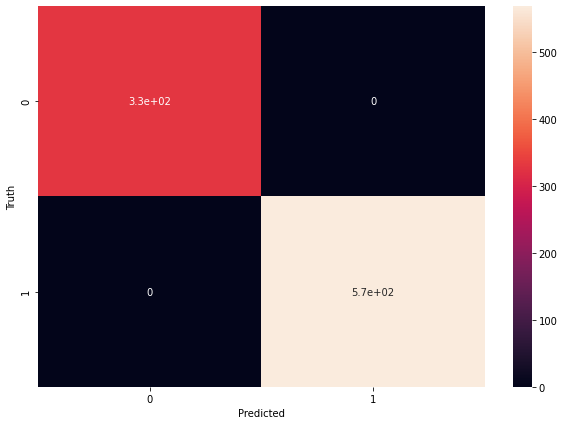

In [175]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [176]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       569

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



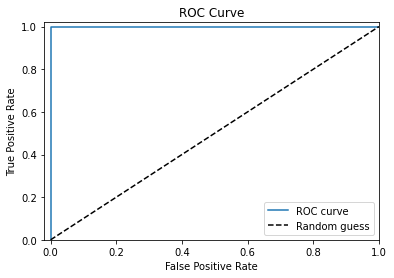

In [177]:
fpr, tpr, thresholds = roc_curve(y_test,prediction_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [178]:
log_loss(y_test,prediction_proba)

0.00024162589870951951

using cross validation

In [179]:
print(cross_val_score(model, x, y, cv=5))

[1. 1. 1. 1. 1.]
